N.B : This code was commented by Chatgpt and reviewd by myself

### **Importing relevant librairies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from imblearn.over_sampling import RandomOverSampler

# **Table to compare different ML algorithm**

In [2]:
# Define the data
data = {
    'Model': ['k-Nearest Neighbors (KNN)', 'Decision Trees', 'Deep Neural Networks (DNN)', 'Convolutional Neural Networks (CNN)', 'Gradient Boosting', 'Deep Learning (General)'],
    'Advantages': ['Simple to understand and implement, No assumptions about data, Can be good if pavement features have close neighbors with similar comfort levels', 'Simple to understand, Can handle both numerical and categorical data, May work well with a mix of pavement features', 'Can model complex patterns, Good with large amount of data, Could be useful for capturing complex relationships between pavement characteristics and comfort level', 'Good for image data, Can capture spatial features, Could be useful if environmental images are important features', 'Can capture complex patterns, Good with structured data, Often provides excellent accuracy, Could work well with a mix of pavement features', 'Can model complex patterns, Good with large amount of data, Could capture complex relationships between features and comfort level'],
    'Disadvantages': ['Computationally expensive, Sensitive to irrelevant features and the scale of the data, May not work well with a large number of features (e.g., various pavement characteristics, environmental images, etc.)', 'Prone to overfitting, Can be unstable with small variations in data, May not capture complex relationships between pavement characteristics and comfort level', 'Require a lot of data, Computationally expensive, Hard to interpret, May overfit with less data', 'Require a lot of data, Computationally expensive, Hard to interpret, May not work well if images are not important features', 'Can be computationally intensive, May require careful tuning of parameters, Overfitting could be a concern', 'Requires large amounts of data, Computationally intensive, Model interpretability can be difficult, Overfitting could be a concern']
}

# Create DataFrame
dfd = pd.DataFrame(data)

# Print the DataFrame
dfd


,Model,Advantages,Disadvantages
0,k-Nearest Neighbors (KNN),"Simple to understand and implement, No assumpt...","Computationally expensive, Sensitive to irrele..."
1,Decision Trees,"Simple to understand, Can handle both numerica...","Prone to overfitting, Can be unstable with sma..."
2,Deep Neural Networks (DNN),"Can model complex patterns, Good with large am...","Require a lot of data, Computationally expensi..."
3,Convolutional Neural Networks (CNN),"Good for image data, Can capture spatial featu...","Require a lot of data, Computationally expensi..."
4,Gradient Boosting,"Can capture complex patterns, Good with struct...","Can be computationally intensive, May require ..."
5,Deep Learning (General),"Can model complex patterns, Good with large am...","Requires large amounts of data, Computationall..."


# **Loading the Dataset**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
# Open the CSV file as a DataFrame
dfr = pd.read_csv("/content/drive/My Drive/internship summer 2023/Dep 39 RD 678 PR 12+ à 21.csv")
dfl = pd.read_csv("/content/drive/My Drive/internship summer 2023/Dep 39 RD 678 PR 21 à 12+.csv")

alerte_r = pd.read_csv("/content/drive/My Drive/internship summer 2023/alert_ 39 RD 678 PR 12+ à 21.csv")
alerte_l = pd.read_csv("/content/drive/My Drive/internship summer 2023/alert_ 39 RD 678 PR 21 à 12+.csv")

# **Visualizing and concatenating the Dataframe with left road and right roads**

In [ ]:
dfr.head()

In [ ]:
dfl.tail()

In [ ]:
alerte_l.tail()

In [ ]:
# Assuming alerte_l and dfl are your dataframes
merged_dfl = pd.merge(dfl, alerte_l[['PR Début', 'Origine', 'Indice']], left_on=['N° PR', 'Dist. PR'], right_on=['PR Début', 'Origine'], how='left')

# Fill missing values in the Indice column with zeros
merged_dfl['Indice'].fillna(0, inplace=True)

# merged_df now contains the merged result with missing values in the Indice column filled with zeros
merged_dfl

In [ ]:
# Assuming alerte_l and dfl are your dataframes
merged_dfr = pd.merge(dfl, alerte_l[['PR Début', 'Origine', 'Indice']], left_on=['N° PR', 'Dist. PR'], right_on=['PR Début', 'Origine'], how='left')

# Fill missing values in the Indice column with zeros
merged_dfr['Indice'].fillna(0, inplace=True)

# merged_df now contains the merged result with missing values in the Indice column filled with zeros
merged_dfr

In [ ]:
print(np.unique(merged_dfl["Indice"]))
print(np.unique(alerte_l["Indice"]))


In [ ]:
df = pd.concat([merged_dfr, merged_dfl], ignore_index=True)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df

In [ ]:
# Convert the 'Indice' column
df['Indice'] = df['Indice'].apply(lambda x: 1 if x > 0 else 0)

# Divide the index by 5 to group every 5 consecutive rows
target = df.groupby(df.index // 5)['Indice'].max()

In [ ]:
df

In [ ]:
"""
# Get the column names
columns = df.columns.tolist()

# Save the head of the DataFrame as an image
plt.figure(figsize=(20, 8))  # Adjust the figure size as needed
plt.table(cellText=[columns] + df.head().values.tolist(),
          colLabels=columns,
          cellLoc="center",
          loc="upper center")
plt.axis("off")
#plt.savefig("C:\France\stage\cerema\Rapport\data_frame_head.png", bbox_inches="tight", pad_inches=0.5)  # Adjust parameters as needed
plt.show()
"""

# **Descriptive Analysis**

In [ ]:
# Descriptive Analysis
descriptive_analysis = df.describe()

# Print the descriptive analysis
print("Descriptive Analysis:")
print(descriptive_analysis)

# Save the descriptive analysis as a LaTeX table
descriptive_analysis_latex = descriptive_analysis.to_latex()

# Save the LaTeX table to a file
with open('/content/drive/My Drive/internship summer 2023/descriptive_analysis.tex', 'w') as f:
    f.write(descriptive_analysis_latex)


# **Qualitative Analysis (Frequency Distribution)**

In [ ]:
# Qualitative Analysis (Frequency Distribution)
print("\nQualitative Analysis (Frequency Distribution):")
categorical_columns = ['N° PR', 'Evénement', 'Commentaire', 'Situation']
for col in categorical_columns:
    print(df[col].value_counts())

# **Qualitative Analysis (Frequency Distribution)**

In [ ]:
# Rename the column 'N° PR' to something without special characters
df.rename(columns={'N° PR': 'PR_Number'}, inplace=True)

# Qualitative Analysis (Frequency Distribution)
print("\nQualitative Analysis (Frequency Distribution):")
categorical_columns = ['PR_Number', 'Evénement', 'Commentaire', 'Situation']
for col in categorical_columns:
    print(df[col].value_counts())
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Frequency Distribution of {col}')
    plt.show()

# **Quantitative Analysis (Correlation Heatmap)**

In [ ]:
# Quantitative Analysis (Correlation Heatmap)
print("\nQuantitative Analysis (Correlation Heatmap):")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **DataFrame Preprocessing**

In [ ]:
df.head()

In [ ]:
columns_to_remove = ["PR_Number" , "Dist. PR" , "Dist cum." , "Evénement", "Commentaire" , "Situation" , "PR Début" , "Origine" , "Indice"]
df = df.drop(columns=columns_to_remove)

In [ ]:
df.head()

In [ ]:
df["Adhérence"] = df["Adhérence"]/1000

In [ ]:
df["Acc. Vert"] = df["Acc. Vert"]/100

In [ ]:
df["Rugo"] = df["Rugo"]/100

In [ ]:
df.head()

In [ ]:
len(df) , len(target)

In [ ]:
np.unique(target)

# **Reshaping the frame to match with the images**

In [ ]:
df

In [ ]:
# Divide the index by 5 to group every 5 consecutive rows
df = df.groupby(df.index // 5).mean()

# Replace NaN values with 0
df_filled = df.fillna(0)

df_filled


In [ ]:
#second approach
"""
# Reshape the DataFrame
reshaped_data = [df.iloc[i:i+5, :].values.flatten() for i in range(0, len(df), 5)]
reshaped_columns = [f'Combined_{col}' for _ in range(5) for col in df.columns]

reshaped_df = pd.DataFrame(reshaped_data, columns=reshaped_columns)
#reshaped_df

# Replace NaN values with 0
df_filled = reshaped_df.fillna(0)
df_filled
"""

In [ ]:
# Remove the last three rows
df = df_filled.iloc[:-3]

#df = df_filled.iloc[:-3]
target = target[:-3]

df

In [ ]:
"""
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv("your_dataset.csv")

# Assuming df contains the columns: radius_of_curvature, adhesion, vertical_acceleration, velocity,
# road_slope, road_cant, road_roughness, and image_filename

# Grouping samples by 5 and calculating mean for each group
grouped_df = df.groupby(np.arange(len(df)) // 5).mean()

# Assuming you have a function that extracts features from an image
def extract_image_features(image_filename):
    # Code to extract image features
    image_features = ...
    return image_features

# Creating a new column with image features
grouped_df['image_features'] = grouped_df['image_filename'].apply(extract_image_features)

# Assuming you have already defined your features' column names
features_columns = ['radius_of_curvature', 'adhesion', 'vertical_acceleration',
                    'velocity', 'road_slope', 'road_cant', 'road_roughness', 'image_features']

# Selecting the columns for the final input
input_df = grouped_df[features_columns]

# Assuming you have your target column, named 'target', indicating prone or safe road section
target_column = 'target'

# Splitting the input_df into X (input features) and y (target)
X = input_df.drop(columns=[target_column])
y = input_df[target_column]
"""

In [ ]:
"""
import os
import cv2
import numpy as np

image_directory = '/content/drive/My Drive/internship summer 2023/Dep 39 RD 678 PR 12+ à 21'
output_directory = '/content/drive/My Drive/internship summer 2023/npy_images'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Loop through all files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith('.jpg'):
        # Load an image from file
        image_path = os.path.join(image_directory, filename)
        image = cv2.imread(image_path)

        # Save the image as an .npy file
        output_path = os.path.join(output_directory, filename.replace('.jpg', '.npy'))
        np.save(output_path, image)

# Now you have saved the images as .npy files

# During model training, you can load and process batches of .npy files
batch_size = 32  # Adjust the batch size as needed

# List all .npy files in the output directory
npy_files = [file for file in os.listdir(output_directory) if file.endswith('.npy')]

for i in range(0, len(npy_files), batch_size):
    batch_files = npy_files[i:i + batch_size]
    batch_images = []

    for file in batch_files:
        image = np.load(os.path.join(output_directory, file))
        # Process the image if needed (e.g., resize, normalize)
        batch_images.append(image)

    image_data_r_batch = np.array(batch_images)
    # Use the batch for model training
    print("Batch shape:", image_data_r_batch.shape)
"""

In [ ]:
"""
import os
import cv2
import numpy as np

image_directory = '/content/drive/My Drive/internship summer 2023/Dep 39 RD 678 PR 12+ à 21'

image_arrays_r = []

for filename in os.listdir(image_directory):
    if filename.endswith('.jpg'):
        image_path = os.path.join(image_directory, filename)
        image = cv2.imread(image_path)
        # Process the image here, e.g., resize, preprocess, etc.
        image_arrays_r.append(image)

image_data_r = np.array(image_arrays_r)
"""

# **Visualizing one picture before preprocessing**

In [ ]:
from google.colab.patches import cv2_imshow

try:
    # Load an image from file
    image_path = '/content/drive/My Drive/internship summer 2023/Dep 39 RD 678 PR 12+ à 21/00001.jpg'
    image = cv2.imread(image_path)

    # Display the image using cv2_imshow
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print("Image shape:", image.shape)
except Exception as e:
    print("Error:", e)

# **Loading the pictures and preprocessing them**

In [ ]:
"""
import os
import cv2
import numpy as np

# Directories containing your image files
image_directory_1 = '/content/drive/My Drive/internship summer 2023/Dep 39 RD 678 PR 12+ à 21'
image_directory_2 = '/content/drive/My Drive/internship summer 2023/Dep 39 RD 678 PR 21 à 12+'

# List to store image arrays
image_arrays_r = []

# Image size for resizing
target_size = (224, 224)  # Change to your desired size

# Batch size for loading images
batch_size = 100

# Loop through all files in the directories
for image_directory in [image_directory_1, image_directory_2]:
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg'):
            # Load an image from file
            image_path = os.path.join(image_directory, filename)
            image = cv2.imread(image_path)

            # Resize the image
            resized_image = cv2.resize(image, target_size)

            # Normalize the image
            normalized_image = resized_image / 255.0  # Normalize pixel values to [0, 1]

            # Append the image array to the list
            image_arrays_r.append(normalized_image)

            # Check if the batch size is reached
            if len(image_arrays_r) == batch_size:
                # Convert the list of arrays to a NumPy array
                batch_data = np.array(image_arrays_r)
                if 'image_data_r' not in locals():
                    image_data_r = batch_data
                else:
                    image_data_r = np.concatenate((image_data_r, batch_data), axis=0)

                # Clear the list for the next batch
                image_arrays_r = []

# Convert the remaining images to a NumPy array
if len(image_arrays_r) > 0:
    batch_data = np.array(image_arrays_r)
    if 'image_data_r' not in locals():
        image_data_r = batch_data
    else:
        image_data_r = np.concatenate((image_data_r, batch_data), axis=0)

# Now you have all your preprocessed images in the 'image_data_r' numpy array
print("Shape of image_data_r:", image_data_r.shape)
"""

In [ ]:
import os
import cv2
import numpy as np

# Directories containing your image files
image_directory_1 = '/content/drive/My Drive/internship summer 2023/Dep 39 RD 678 PR 12+ à 21'
image_directory_2 = '/content/drive/My Drive/internship summer 2023/Dep 39 RD 678 PR 21 à 12+'

# List to store image arrays
image_arrays_r = []

# Image size for resizing
target_size = (224, 224)  # Change to your desired size

# Batch size for loading images
batch_size = 32

# Loop through all files in the directories
for image_directory in [image_directory_1, image_directory_2]:
    filenames = sorted(os.listdir(image_directory))  # Sort the filenames
    for filename in filenames:
        if filename.endswith('.jpg'):
            # Load an image from file
            image_path = os.path.join(image_directory, filename)
            image = cv2.imread(image_path)

            # Resize the image
            resized_image = cv2.resize(image, target_size)

            # Normalize the image
            normalized_image = resized_image / 255.0  # Normalize pixel values to [0, 1]

            # Append the image array to the list
            image_arrays_r.append(normalized_image)

            # Check if the batch size is reached
            if len(image_arrays_r) == batch_size:
                # Convert the list of arrays to a NumPy array
                batch_data = np.array(image_arrays_r)
                if 'image_data_r' not in locals():
                    image_data_r = batch_data
                else:
                    image_data_r = np.concatenate((image_data_r, batch_data), axis=0)

                # Clear the list for the next batch
                image_arrays_r = []

# Convert the remaining images to a NumPy array
if len(image_arrays_r) > 0:
    batch_data = np.array(image_arrays_r)
    if 'image_data_r' not in locals():
        image_data_r = batch_data
    else:
        image_data_r = np.concatenate((image_data_r, batch_data), axis=0)

# Now you have all your preprocessed images in the 'image_data_r' numpy array
print("Shape of image_data_r:", image_data_r.shape)


In [ ]:
(image_data_r[0])

In [ ]:
image_data_r[0].shape

In [ ]:
print("Min pixel value:", image_data_r[0].min())
print("Max pixel value:", image_data_r[0].max())

# **Visualizing one picture after preprocessing**

In [ ]:
import matplotlib.pyplot as plt

# Display the image using matplotlib
plt.imshow(image_data_r[0])
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
# Get the column names
columns = df.columns.tolist()

# Save the head of the DataFrame as an image
plt.figure(figsize=(20, 8))  # Adjust the figure size as needed
plt.table(cellText=[columns] + df.head().values.tolist(),
          colLabels=columns,
          cellLoc="center",
          loc="upper center")
plt.axis("off")
#plt.savefig("C:\France\stage\cerema\Rapport\data_frame_head.png", bbox_inches="tight", pad_inches=0.5)  # Adjust parameters as needed
plt.show()

# **Learning phase**

In [ ]:
len([e for e in target if e == 0]) , len([e for e in target if e > 0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import cross_val_score, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential

In [ ]:
"""
# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(df , target)
"""

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



# Step 1: Modify the CNN to output a lower-dimensional feature vector
def modified_cnn(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(GlobalAveragePooling2D())  # Reduce dimensions
    return model

# Step 2: Extract features from images using the modified CNN
def extract_image_features_reduced(images):
    input_shape = images[0].shape
    cnn_model = modified_cnn(input_shape)
    image_features = cnn_model.predict(images)
    return image_features

# Extract image features
image_features = extract_image_features_reduced(image_data_r)

# Convert image features to a DataFrame
image_features_df = pd.DataFrame(image_features, columns=[f'img_feat_{i}' for i in range(image_features.shape[1])])

# Concatenate image features with the original dataframe
df_with_image_features = pd.concat([df, image_features_df], axis=1)

# Now df_with_image_features contains your original dataframe with the added image features as new columns
print(df_with_image_features.head())

In [ ]:
from imblearn.over_sampling import SMOTENC


X = df_with_image_features
y = target

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
# Step 2: Apply oversampling to the training data
oversampler = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
"""

# Step 2: Apply oversampling to the training data
smotenc = SMOTENC(random_state=42, categorical_features=[2, 5])  # categorical_features is a list of column indices for categorical features
X_train_oversampled, y_train_oversampled = smotenc.fit_resample(X_train, y_train)

# Step 3: Initialize cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)


In [ ]:
# Step 5: Perform hyperparameter tuning for XGBoost using cross-validation
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_model = XGBClassifier(random_state=42)
grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5)
grid_xgb.fit(X_train_oversampled, y_train_oversampled)

print("Best XGBoost Hyperparameters:", grid_xgb.best_params_)

KeyboardInterrupt: ignored

In [ ]:
# Step 6: Build and train the XGBoost model using cross-validation
for train_index, val_index in cv.split(X_train_oversampled, y_train_oversampled):
    X_train_fold, X_val_fold = X_train_oversampled.iloc[train_index], X_train_oversampled.iloc[val_index]
    y_train_fold, y_val_fold = y_train_oversampled.iloc[train_index], y_train_oversampled.iloc[val_index]

    # Build and train the XGBoost model on the current fold
    model = XGBClassifier(random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the XGBoost model on the validation fold
    y_val_pred = model.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)

    print("Validation Fold Metrics for XGBoost:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

Validation Fold Metrics for XGBoost:
Accuracy: 0.995579133510168
Precision: 0.9909747292418772
Recall: 1.0
F1 Score: 0.9954669084315504
Validation Fold Metrics for XGBoost:
Accuracy: 0.9973474801061007
Precision: 0.9945848375451264
Recall: 1.0
F1 Score: 0.9972850678733033
Validation Fold Metrics for XGBoost:
Accuracy: 0.9973474801061007
Precision: 0.9947735191637631
Recall: 1.0
F1 Score: 0.9973799126637556
Validation Fold Metrics for XGBoost:
Accuracy: 0.9964633068081344
Precision: 0.9929701230228472
Recall: 1.0
F1 Score: 0.9964726631393298
Validation Fold Metrics for XGBoost:
Accuracy: 0.9991150442477876
Precision: 0.9983108108108109
Recall: 1.0
F1 Score: 0.9991546914623838


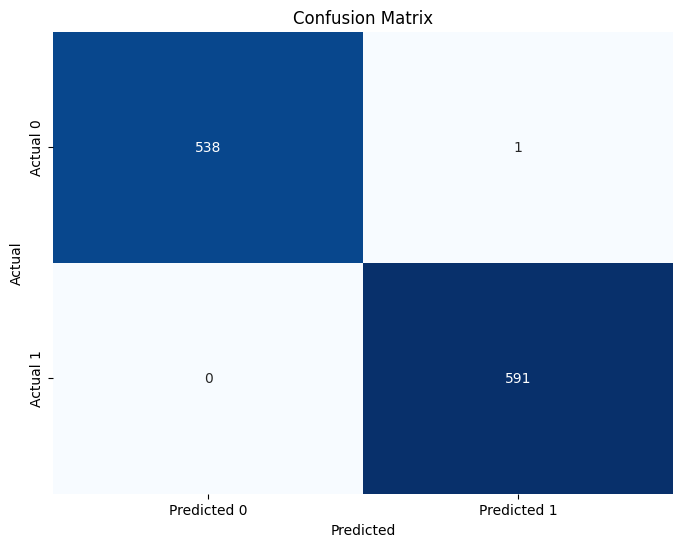

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val_fold, y_val_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
"""
# Initialize the XGBoost classifier
model = XGBClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Step 3: Evaluate the model on the testing set
# Make predictions on the test set
y_pred = model.predict(X_test)
"""

Average Precision and ROC-AUC score

In [ ]:
from sklearn.metrics import average_precision_score, roc_auc_score


# Step 7: Train the final model on the entire training set and evaluate on the test set
final_model = XGBClassifier(random_state=42)
final_model.fit(X_train, y_train)
# Assuming you have your final_model already trained on the training set

# Predict probabilities on the validation set
y_val_probs = final_model.predict_proba(X_val_fold)[:, 1]

# Calculate the average precision score
average_precision = average_precision_score(y_val_fold, y_val_probs)
print("Average Precision Score:", average_precision)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_val_fold, y_val_probs)
print("ROC-AUC Score:", roc_auc)

Average Precision Score: 0.997371812678854
ROC-AUC Score: 0.9969863349123683


In [ ]:
# Step 7: Train the final model on the entire training set and evaluate on the test set
final_model = XGBClassifier(random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Test Set Metrics:
Accuracy: 0.988795518207283
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


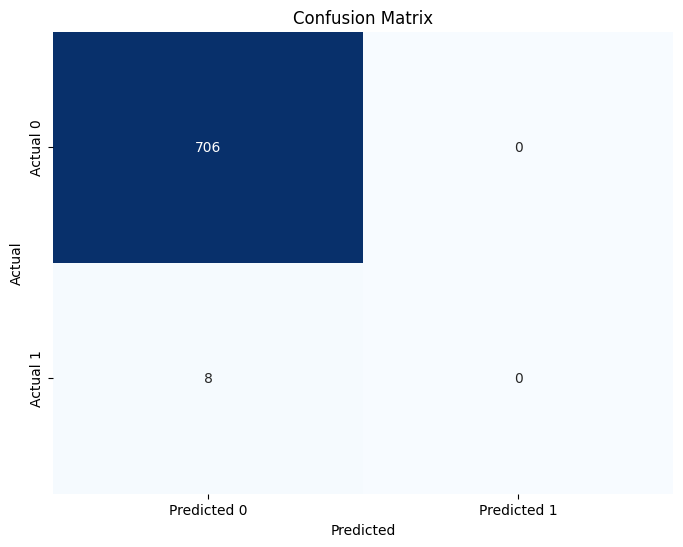

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
"""
# Step 3: Extract reduced-dimensional image features
image_features_reduced = extract_image_features_reduced(image_data_r)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Concatenate reduced-dimensional image features with original training data
X_train_concatenated = np.concatenate((X_train, image_features_reduced), axis=1)

# Step 6: Apply oversampling to the concatenated training feature set
oversampler = SMOTE(random_state=42)
X_oversampled_reduced, y_oversampled_reduced = oversampler.fit_resample(X_train_concatenated, y_train)

# Now you can use X_oversampled_reduced and y_oversampled_reduced for training your model
"""

In [ ]:
"""
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
"""
# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(df , target)

X_resampled
"""

In [ ]:
#sum(y_resampled == 1) , sum(y_resampled == 0)

In [ ]:
"""
from sklearn.model_selection import train_test_split

# Splitting the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
"""

In [ ]:
"""
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load pre-trained CNN model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features from images
image_features = base_model.predict(image_data_r)

# Flatten the image features
image_features_flat = image_features.reshape(image_features.shape[0], -1)

# Concatenate image features to training data
X_train_with_image_features = np.hstack((X_train, image_features_flat))
"""

In [ ]:
#image_features_flat.shape

In [ ]:
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor

# Load your preprocessed dataframe
df = pd.read_csv('your_preprocessed_data.csv')

# Extracted image features (replace with actual extracted features)
image_features = pd.read_csv('extracted_image_features.csv')

# Combine image features with existing features
df = pd.concat([df, image_features], axis=1)

# Handle missing values
imputer = SimpleImputer(strategy='median')
df_filled = imputer.fit_transform(df)

# Encode categorical variables if any
encoder = OneHotEncoder()
# Apply encoder to categorical columns

# Split data into training and testing sets
X = df_filled.drop('target_variable', axis=1)  # Features
y = df_filled['target_variable']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a gradient boosting model
model = XGBRegressor()
model.fit(X_train_scaled, y_train)

# Evaluate the model
predictions = model.predict(X_test_scaled)
# Evaluate metrics, plot results, etc.


In [ ]:
"""
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
# Separate features and target variable
X = df.drop('Commentaire', axis=1)  # Features
y = df['Commentaire']  # Target

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scaling and Imputation
scaler = StandardScaler()
imputer = SimpleImputer(strategy='median')

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Now X_train_imputed and X_test_imputed are your preprocessed feature sets
# You can use them for training your gradient boosting model


In [ ]:
#seuil = 3